# Estatística Descritiva

Este notebook tem como propósito a exploração e análise de um conjunto de dados relacionado ao mercado imobiliário nos Estados Unidos. A motivação por trás desta análise é compreender os fatores que influenciam a variação nos preços das residências, visando identificar as razões pelas quais algumas casas apresentam valores superiores em comparação a outras. Para atingir esse objetivo, empregaremos técnicas de estatística descritiva.

A estatística descritiva é uma abordagem estatística que nos permite resumir e interpretar padrões nos dados. Ao aplicar essas técnicas ao conjunto de dados do mercado imobiliário, buscamos extrair insights significativos sobre as características que impactam diretamente nos preços das residências. Essa compreensão mais profunda pode ser fundamental para investidores, compradores e agentes imobiliários, fornecendo uma base sólida para a tomada de decisões informadas.

Ao longo deste notebook, exploraremos diversas métricas estatísticas, gráficos descritivos e análises comparativas para revelar padrões e tendências presentes no mercado imobiliário. A intenção é não apenas identificar correlações entre variáveis, mas também oferecer uma visão abrangente das nuances que influenciam o valor das propriedades. Essas descobertas podem fornecer insights valiosos para os interessados no setor imobiliário, contribuindo para uma compreensão mais clara do cenário em questão.

## Conhecendo nosso dataset

Para iniciar a análise vamos explorar um pouco do nosso dataset, verificando tipos de dados, valores nulos, algumas estatísticas decritivas, assim como a distribuição dos nossos dados. 

Uma parte importante dessa etapa é entender o que cada coluna do dataset significa, abaixo um resumo com nomes e conteúdo de cada coluna. 

&nbsp;&nbsp;&nbsp;**SalePrice:** Price of sale  
&nbsp;&nbsp;&nbsp;**OverallQual:** Rates the overall material and finish of the house  
&nbsp;&nbsp;&nbsp;**OverallCond:** Rates the overall condition of the house  
&nbsp;&nbsp;&nbsp;**BedroomAbvGr:** Bedrooms above grade (does NOT include basement bedrooms)  
&nbsp;&nbsp;&nbsp;**TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)  
&nbsp;&nbsp;&nbsp;**GrLivArea:** Above grade (ground) living area square feet  
&nbsp;&nbsp;&nbsp;**TotalBsmtSF:** Total square feet of basement area  
&nbsp;&nbsp;&nbsp;**YearBuilt:** Original construction date  
&nbsp;&nbsp;&nbsp;**MSZoning:** Identifies the general zoning classification of the sale  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;A    Agriculture  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;C    Commercial  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;FV    Floating Village Residential  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;I     Industrial  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;RH    Residential High Density  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;RL    Residential Low Density  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;RP    Residential Low Density Park   
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;RM    Residential Medium Density  
&nbsp;&nbsp;&nbsp;**Utilities:** Type of utilities available  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;AllPub    All public Utilities (E,G,W,& S)      
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;NoSewr    Electricity, Gas, and Water (Septic Tank)  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;NoSeWa    Electricity and Gas Only  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;ELO       Electricity only      
&nbsp;&nbsp;&nbsp;**BldgType:** Type of dwelling  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;1Fam      Single-family Detached      
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;2FmCon    Two-family Conversion; originally built as one-family dwelling  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;Duplx     Duplex  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;TwnhsE    Townhouse End Unit  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;TwnhsI    Townhouse Inside Unit  

In [147]:
#Importando pacotes para realizar a análise de dados.

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [152]:
#Lendo o arquivo para iniciar as análises

df = pd.read_csv('../../data/Aula01 - Estatistica Descritiva/house_price.csv')

### Conhechendo a dimensão do nosso dataset

Vamos iniciar verficando qual o tamanho do nosso dataset, valores nulos e tipos de dados.

Como é possível ver nosso dataset possui 1460 linhas e 12 colunas.

In [153]:
#shape

df.shape

(1460, 12)

Nosso dataset possui 12 colunas, sendo 8 númericas e 4 categóricas.

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1460 non-null   int64 
 1   SalePrice     1460 non-null   int64 
 2   OverallQual   1460 non-null   int64 
 3   OverallCond   1460 non-null   int64 
 4   BedroomAbvGr  1460 non-null   int64 
 5   TotRmsAbvGrd  1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   TotalBsmtSF   1460 non-null   int64 
 8   YearBuilt     1460 non-null   int64 
 9   MSZoning      1460 non-null   object
 10  Utilities     1460 non-null   object
 11  BldgType      1460 non-null   object
dtypes: int64(9), object(3)
memory usage: 137.0+ KB


Nosso dataset não possui nenhum valor nulo, o que facilitará nossa análise.

In [149]:
df.isnull().sum()

Unnamed: 0      0
SalePrice       0
OverallQual     0
OverallCond     0
BedroomAbvGr    0
TotRmsAbvGrd    0
GrLivArea       0
TotalBsmtSF     0
YearBuilt       0
MSZoning        0
Utilities       0
BldgType        0
dtype: int64

Antes de iniciarmos vamos remover a coluna "Unnamed: 0" que provavelmente era apenas um índice de algum dataframe exportado e não será importante na nossa análise.

In [155]:
#Removendo coluna que não iremos utilizar
df = df[[ 'SalePrice', 'OverallQual', 'OverallCond', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'MSZoning',
       'Utilities', 'BldgType']] 

## Analisando variavéis númericas 

Agora que conhecemos o nosso dataset vamos iniciar nossa análise partindo das variaveís numericas. Abaixo algumas das principais estatísticas descritivas de cada coluna:

In [145]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.00,163000.0,214000.00,755000.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.00,3.0,3.00,8.0
TotRmsAbvGrd,1460.0,6.517808,1.625393,2.0,5.00,6.0,7.00,14.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0


Na tabela acima podemos verificar as principais estatísticas de cada coluna, porém é sempre interessante verificarmos através de gráficos a distribuição dos dados, para tal será plotado para cada variável um boxplot e um histograma, dois tipos de gráficos que nos ajudam a compreender melhor como nossos dados estão distribuídos.

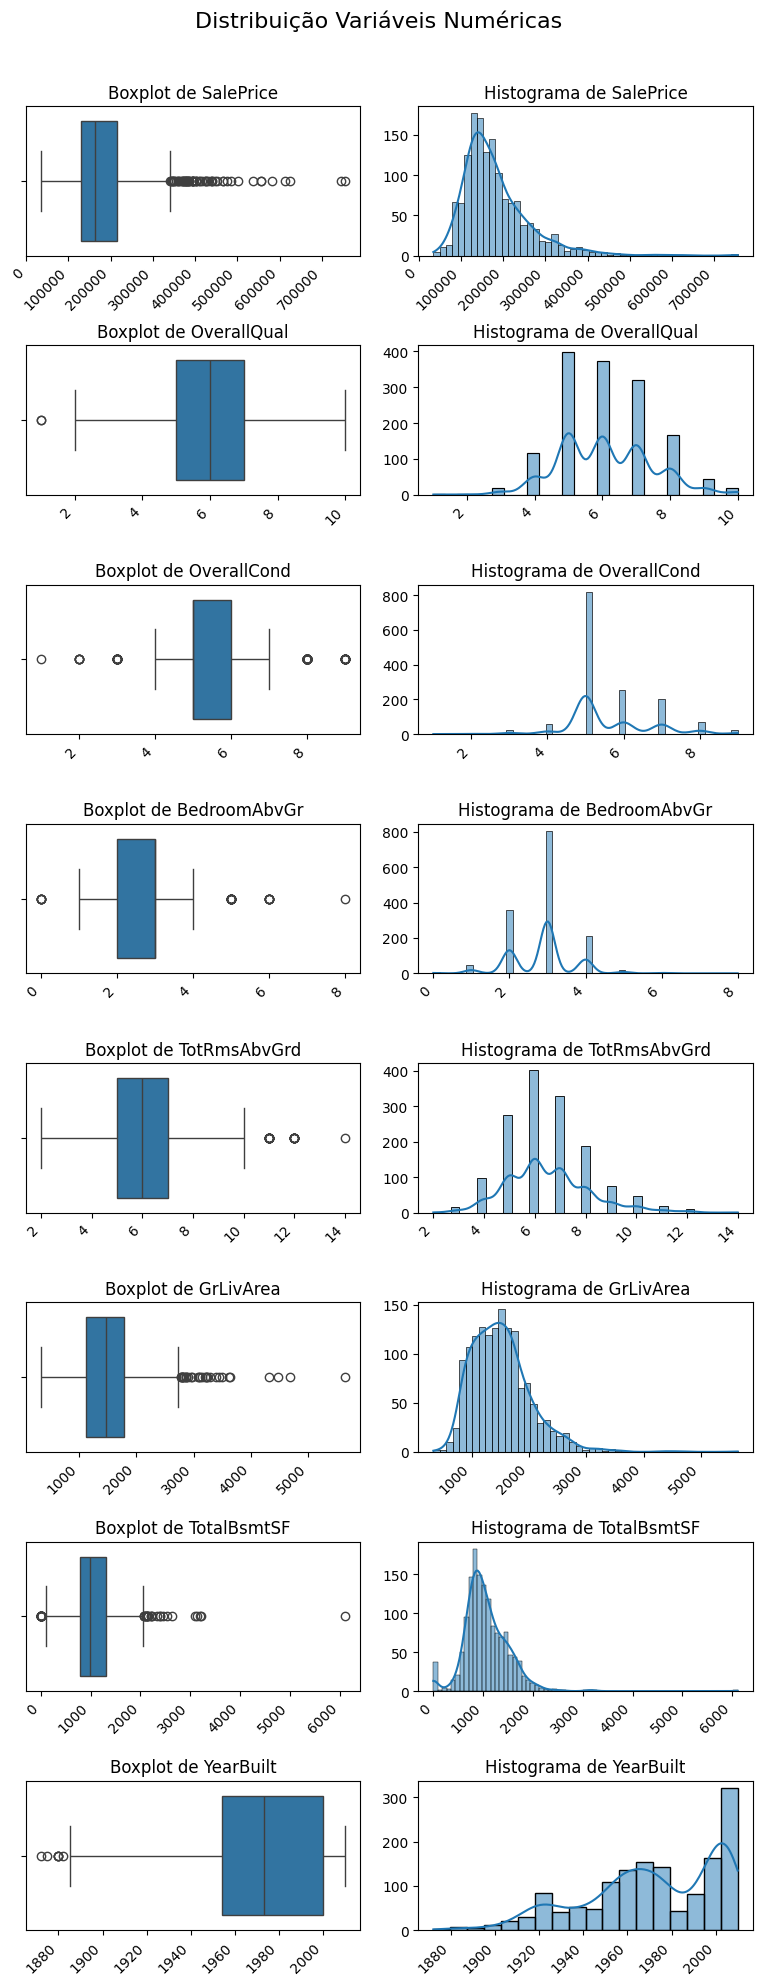

In [157]:

fig,axes = plt.subplots(ncols=2,nrows=8,figsize = (8,20))
axes = axes.flatten()
fig.suptitle('Distribuição Variáveis Numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(hspace=0.6)
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    sns.boxplot(x=df[col], ax=axes[i*2])
    axes[i*2].set(xlabel='')
    axes[i*2].set_title(f'Boxplot de {col}')
    axes[i*2].set_xticklabels(axes[i*2].get_xticklabels(), rotation=45, ha='right') 
    # Histograma à direita
    sns.histplot(df[col], ax=axes[i*2 + 1], kde=True)
    axes[i*2 + 1].set_title(f'Histograma de {col}')
    axes[i*2 + 1].set(xlabel='',ylabel='')
    axes[i*2 + 1].set_xticklabels(axes[i*2 + 1].get_xticklabels(), rotation=45, ha='right') 

Vamos dar uma olhada na nossa variável que queremos concentrar nossa análise, o preço de venda:

- **SalePrice (Preço de Venda)**: possuímos uma grande amplitude do preço de venda, indo de \$34.900 até \$755.000. Com uma média de \$180921.19, mediana  de  \$163000 e desvio padrão \$79442.50.  Temos um desvio padrão alto, o que significa que nossos valores estão desviando muito da média, o que é percepítivel principalmente no 4° quartil, onde os valores vão de \$214.000 até \$755.000, fazendo com que nossa distribuição de dados tenha uma cauda longa para a direita.  

Todas as outras estatísticas a respeito das nossas varáveis são interessantes para que possamos conhecer nossos dados, porém só geraram valor se  as analisarmos em relação a nossa variável resposta (preço de venda). Para tal análise seria interessante termos a classificação de o que seria uma casa cara e o que seria uma casa barata, como nosso dataset não possui tal informação vamos arbitrar que casas acima do 3° quartil de preço serão consideradas cara e o restante serão consideradas baratas.  

Para prosseguirmos com nossa análise poderíamos adotar duas metodologias: análise univariada e análise multivariada, nesse início iremos focar na análise univariada.


Criando nossa coluna de classificação de preço:

In [158]:
df['CatPrice'] = np.where(df['SalePrice'] > df['SalePrice'].quantile(0.75),'Expensive','Cheap')

Com nossa coluna criada, podemos verificar como é a distribuição do preço das casas para cada uma das categorias. O que nos permite verificar que na categoria Cheap temos dados menos dispersos e já na categoria Expensive possuímos uma alta variação na distribuição dos nossos dados, com uma cauda grande para a direita.

Text(0.5, 1.0, 'Distribuição de preço de venda por categoria')

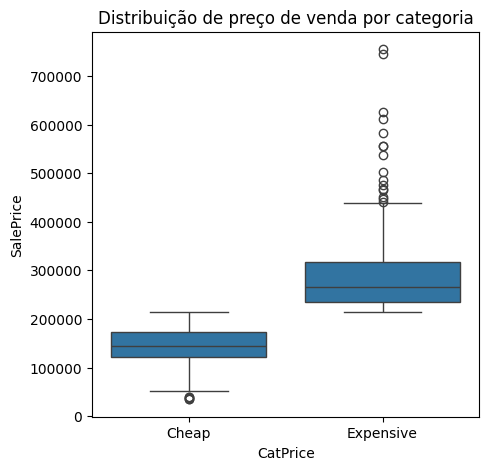

In [180]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.boxplot(x='CatPrice', y= 'SalePrice',data=df) 
ax.set_title('Distribuição de preço de venda por categoria')

Agora vamos verificar a distribuição das nossas outras variáveis numéricas para cada uma das categorias.

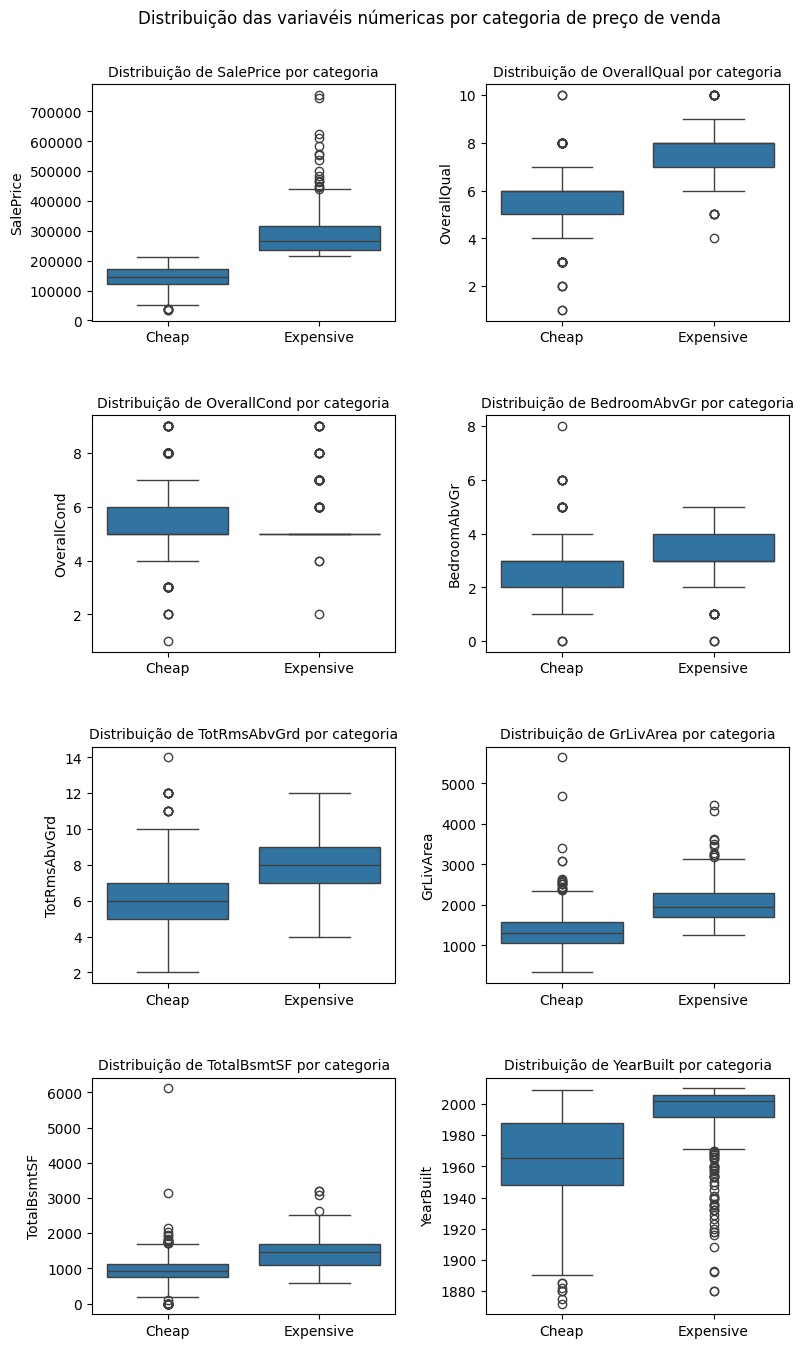

In [198]:
fig, ax = plt.subplots(nrows=4,ncols=2,figsize=(9,15))
plt.subplots_adjust(hspace=0.4,wspace=0.299,top=0.93)
##plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle('Distribuição das variavéis númericas por categoria de preço de venda')
ax = ax.flatten()
for i,col in enumerate(df.select_dtypes(include=np.number).columns):
    sns.boxplot(x='CatPrice',y=col,data=df,ax = ax[i])
    ax[i].set(xlabel='')
    ax[i].set_title(f'Distribuição de {col} por categoria',fontsize=10)


Analisando os gráficos percebemos alguns pontos interessantes: 

O primeiro ponto a ser falado é que em todas as categorias nós temos sobreposição dos boxplots, o que indica que alguns dados das categorias cheap possui características parecidas com a categoria expensive, o que indica que apenas a análise descritiva pode não ser suficiente para afirmar total a causalidade de uma variável sobre a outra, nesses casos seria interessante realizarmos análises mais profundas, como teste de hipotéses. 

Partindo para a análise dos gráficos podemos perceber os seguintes pontos: casas caras tendem a possuir notas maiores de qualidade do material, assim como maior número de quartos e cómodos e maior área total e área de porão. Porém possuímos dois pontos relevantes, sobre a nota da condição geral para casas da categoria expensive podemos observar que nosso boxplot não conseguiu representar muito bem a distribuição dos dados, isso pode acontecer por termos uma grande concentração de dados em um único ponto. Vamos observar no código abaixo: 


In [204]:
df[df['CatPrice']=='Expensive']['OverallCond'].value_counts()

OverallCond
5    284
7     32
6     25
8      9
9      9
4      2
2      1
Name: count, dtype: int64

Como foi observado a grande maioria dos dados estão contidos na nota 5, o que faz com que o boxplot não seja uma bora representação e também torna a variável pouco explicativa para nossa análise. A princípio pode se tratar de algum erro de preenchimento ou uma imputação de dados feita de maneira equivocada.  

Outro ponto relevante é a nossa variável de área total, o boxplot mostra que as casas mais caras tendem a possuir uma área total maior, porém também é perceptível que temos várias casas da categoria cheap com áreas tão grandes quanto imóveis da categoria expensive. Uma abordagem interessante seria criar uma nova variável de preço por pé quadrado e reclassificar as casas entre caras e baratas por essa variável, a fim de que possamos rever nossa análise nessa nova perspectiva. Vamos lá: 

In [207]:

df['PriceToArea'] = df['SalePrice'] / df['GrLivArea']
df.PriceToArea.describe()

count    1460.000000
mean      120.572878
std        31.391081
min        28.358738
25%        99.822008
50%       120.099031
75%       138.700041
max       276.250881
Name: PriceToArea, dtype: float64

Podemos verificar que nessa nova variável também temos uma grande dispersão dos dados entre o 3° e 4° quartil, porem temos uma média e mediana mais próximas, assim como um desvio padrão menor. 

Assim sendo, vamos seguir a mesma premissa de que imóveis acima do terceiro quartil serão considerados caros e o restante dos imóveis como baratos e vamos verificar novamente nossas outras variáveis para cada uma das categorias.

## Verificando a distribuição das variáveis númericas 


C:\Users\klace\AppData\Local\Temp\ipykernel_14360\1458347046.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i*2].set_xticklabels(axes[i*2].get_xticklabels(), rotation=45, ha='right')
C:\Users\klace\AppData\Local\Temp\ipykernel_14360\1458347046.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i*2 + 1].set_xticklabels(axes[i*2 + 1].get_xticklabels(), rotation=45, ha='right')
C:\Users\klace\AppData\Local\Temp\ipykernel_14360\1458347046.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i*2].set_xticklabels(axes[i*2].get_xticklabels(), rotation=45, ha='right')
C:\Users\klace\AppData\Local\Temp\ipykernel_14360\1458347046.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after

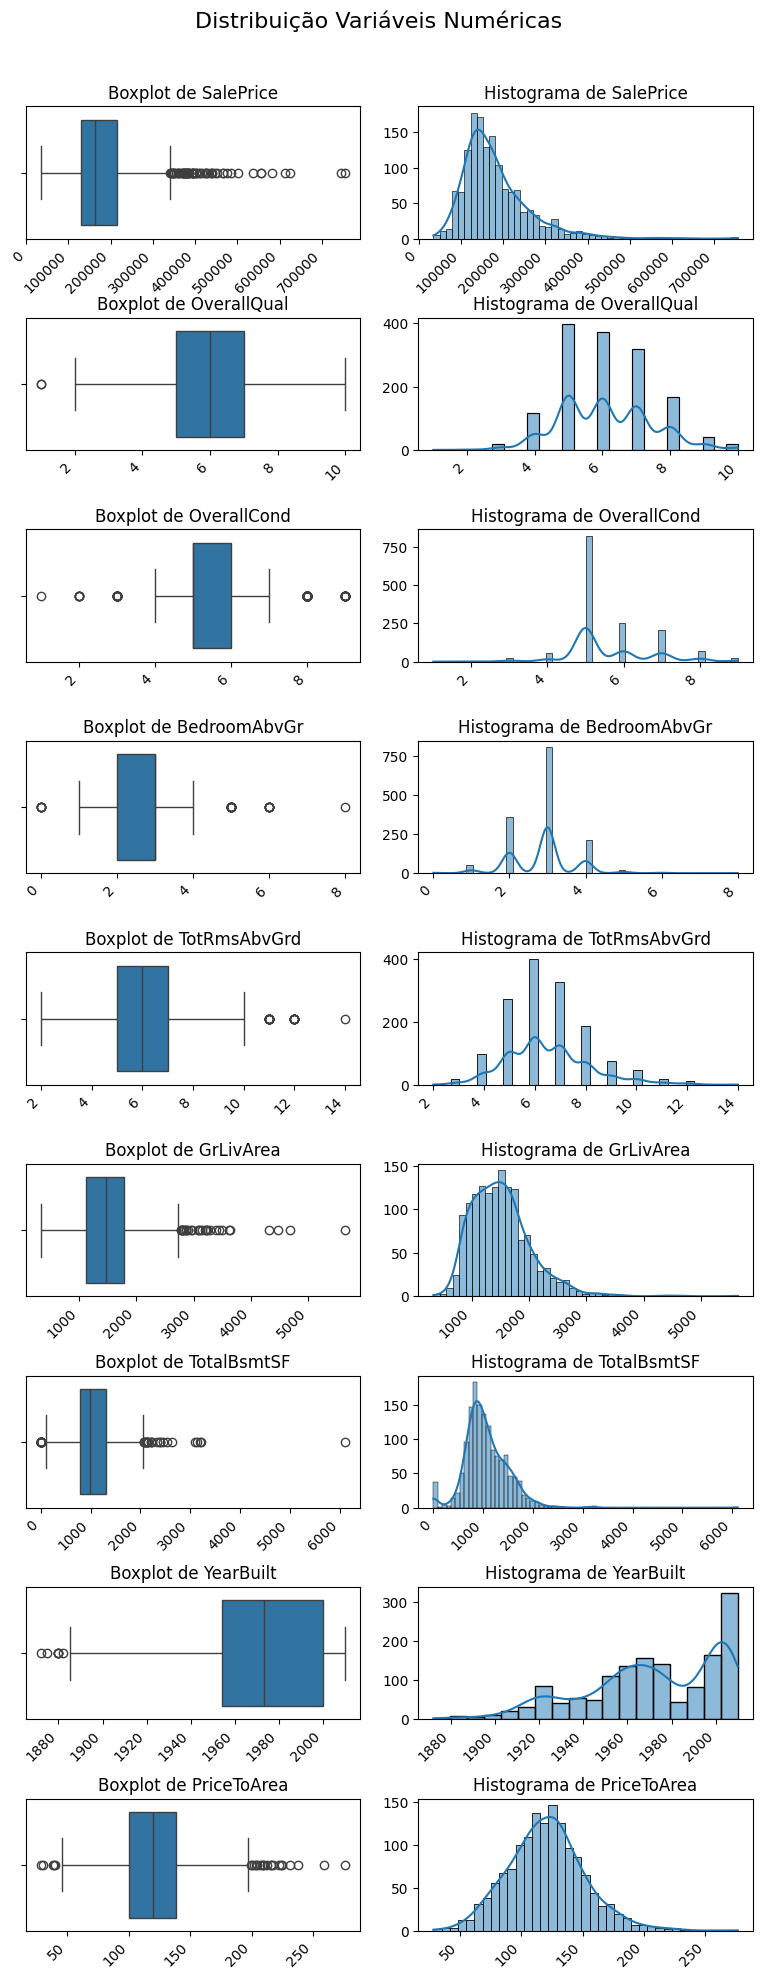

In [85]:
df['CatTotalPreco'] = np.where(df['SalePrice']>df['SalePrice'].quantile(0.75),'cara','barata')
df['CatPriceToArea'] = np.where(df['PriceToArea']>df['PriceToArea'].quantile(0.75),'cara','barata')
df

,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType,PriceToArea,CatTotalPreco,CatPriceToArea
0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam,121.929825,barata,barata
1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam,143.819334,barata,cara
2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam,125.139978,cara,barata
3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam,81.537566,barata,barata
4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam,113.739763,cara,barata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,5,3,7,1647,953,1999,RL,AllPub,1Fam,106.253795,barata,barata
1456,210000,6,6,3,7,2073,1542,1978,RL,AllPub,1Fam,101.302460,barata,barata
1457,266500,7,9,4,9,2340,1152,1941,RL,AllPub,1Fam,113.888889,cara,barata
1458,142125,5,6,2,5,1078,1078,1950,RL,AllPub,1Fam,131.841373,barata,barata


[Text(0.5, 0, 'Categoria'), Text(0, 0.5, 'Area')]

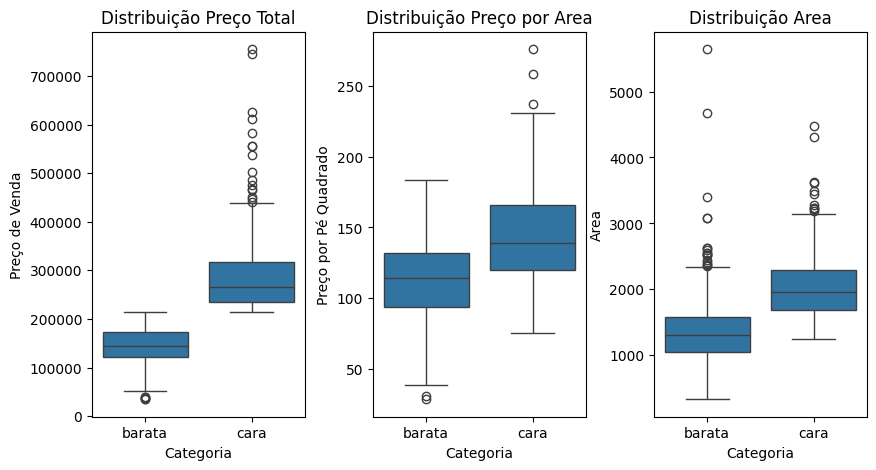

In [116]:
#No curso foi definido que uma casa cara seria uma casa que estivesse qual o valor maior que o terceiro quartil da coluna 
#preço de venda, quis verificar se as casas consideradas baratas, teriam o valor do pé quadrado menor do que as casas
#consideradas caras. Nesse gráfico podemos verificar que não, uma pode ser considerada barata porém ter um preço por pé
#quadrado maior do que uma casa considerada cara.

fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(10,5))
plt.subplots_adjust(wspace=0.32)

sns.boxplot(x='CatTotalPreco',y='SalePrice',data=df,ax=ax[0])
ax[0].set_title('Distribuição Preço Total') 
ax[0].set(xlabel='Categoria',ylabel='Preço de Venda')

sns.boxplot(x='CatTotalPreco',y='PriceToArea',data=df,ax=ax[1])
ax[1].set_title('Distribuição Preço por Area') 
ax[1].set(xlabel='Categoria',ylabel='Preço por Pé Quadrado')

sns.boxplot(x='CatTotalPreco',y='GrLivArea',data=df,ax=ax[2])
ax[2].set_title('Distribuição Area') 
ax[2].set(xlabel='Categoria',ylabel='Area')


In [127]:
df.groupby('CatTotalPreco').agg({'SalePrice':('mean','median','min','max'),
                                       'PriceToArea': ('mean','median','min','max'),
                                       'GrLivArea':('mean','median','min','max')})

SalePrice                           PriceToArea  \
                        mean    median     min     max        mean   
CatTotalPreco                                                        
barata         145414.087432  144000.0   34900  214000  112.776590   
cara           288619.552486  264780.5  214500  755000  144.220182   

                                                    GrLivArea                \
                   median        min         max         mean  median   min   
CatTotalPreco                                                                 
barata         114.400165  28.358738  183.844340  1342.642077  1308.5   334   
cara           139.072780  75.514139  276.250881  2039.657459  1956.0  1252   

                     
                max  
CatTotalPreco        
barata         5642  
cara           4476